<a href="https://colab.research.google.com/github/angeloBuso/ViolenciaRJ/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Imagem" width="100%" src="https://raw.githubusercontent.com/angeloBuso/angeloBuso/main/image/Imagem2-notebook.png">

---

# Explorando os dados da Segurança Pública do Rio de Janeiro
O Rio de Janeiro não é famoso apenas pelas belas paisagens naturais que possui, mais também, infelizmente, pela quantidade de notícias sobre o quão violento é o estado. Ao passo que a violência avança e atinge grande parte das cidades brasileiras, ganha cada vez mais destaques nos noticiários.

Compreender a evolução dessa violência, bem como as possíveis causas que as originaram, poderiam auxiliar na percepção e no entendimento do comportamento desses atos violentos praticados. Os dados históricos podem ser um grande aliado nessa missão de reduzir a violência nas cidades brasileiras.

<img alt="Imagem" width="100%" src="https://raw.githubusercontent.com/angeloBuso/ViolenciaRJ/main/image/RJ-696x396.jpg">

Intuito desse projeto é explorar os dados históricos que o Governo do Estado do Rio de Janeiro disponibiliza junto ao seu orgão de Segurança Pública o [ISP - RJ](https://www.ispdados.rj.gov.br/).

Em linha com a Lei de Acesso à Informação a missão do ISP - RJ é:


> produzir informações e disseminar pesquisas e análises com vistas a influenciar e subsidiar a implementação de políticas públicas de segurança e assegurar a participação social na construção dessas políticas.

Os dados divulgadas pelo ISP - RJ são construídos a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM).

Antes de serem consolidados e mensalisados no ISP, os dados são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil.

## 1. Compreensão Problema de Negócio
Usando a mentalidade de *open data* cada vez mais presente nas instituições e empresas aqui no Brasil, utilizaremos os dados o ISP - RJ, os quais baseiam-se na data em que foi confeccionado o Registro de Ocorrência e entrada nos orgãos competentes.

Sendo assim, com a robustez das bibliotecas **Pandas** e **Numpy** para manipulação de dados, no intuito de obter insigths e extrair informações de nossos dados, iremos explorar esses dados sobre a violência e criminalidade no estado do Rio de Janeiro.

Por se tratar de uma série histórica desde 1991, (i.) recortaremos os dados para um período de análise para os anos de 2015 à 2021 e (ii.) faremos uma exploração em três das 56 variáveis relacionadas a violência que o ISP - RJ acompanha.

In [1]:
# importar os pacotes necessarios para projeto
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

## 2. Obtenção dos Dados

Os dados para a presente análise foram extraídos do repositório do [ISP - RJ](https://www.ispdados.rj.gov.br:4432/estatistica.html) que disponibiliza uma série mensal histórica desde 1991.

Foi feito tratamento antes da carga (vide seção Anexo - Tratamento dados na fonte). Diponibilizamos tanto o dataSet original como o dataSet realizado processo mínimo de tratamento no repositório do [github](https://github.com/angeloBuso/ViolenciaRJ/tree/main/dataset).



### 2.1 Carga dos dados

DICA:
* até 3 dimensões PANDAS (1Series, 2DataFrame e 3Panel).
* acima 3 dim NUMPY (nparray)


In [2]:
dados = "https://raw.githubusercontent.com/angeloBuso/ViolenciaRJ/main/dataset/DOMensalEstadoDesde1991_etl.csv"
df = pd.read_csv(dados, delimiter=';')

### 2.2 Dicionários dados
Uma boa-prática é construir um dicionário de dados, com uma descrição do que cada variável representa.
O ISP-RJ possui uma relação completa discricionária dos dados, como nossos dados possuem 56 variáveis, colocamos nos anexos. Caso prefira, segue repositório para [baixar a tabela](https://github.com/angeloBuso/ViolenciaRJ/blob/main/dataset/DicionarioVariaveisDOMensalEstadoDesde1991.xlsx).

## 3. Análise Exploratória dos Dados

Visão geral dos dados que iremos analisar.

É preciso compreender com o que estamos lidando. Nesta etapa verificamos as (i.) dimensões dos dados, (ii.) o que significa cada atributo no contexto dos dados, (iii.) os tipos dos dados, (iv.) informações que os dados representam, (v.) valores ausentes, (vi.) informações descritivas dos dados, (vii.) variáveis preditoras/ independentes e (viii.) variáveis respostas / target, sendo essas duas últimas quando trabalhamos com modelos preditivo, que não é escopo deste trabalho.

In [3]:
df.head(10)

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3
5,1991,6,647,NaN,14,NaN,NaN,661,201,2977,NaN,NaN,NaN,831,NaN,342,1173,1354,82,518,178,37,NaN,NaN,NaN,NaN,81,3423,1992,673,NaN,NaN,NaN,3519,6184,NaN,NaN,NaN,NaN,157,NaN,NaN,NaN,802,NaN,NaN,NaN,NaN,NaN,NaN,111,NaN,NaN,NaN,NaN,3
6,1991,7,558,NaN,14,NaN,NaN,572,201,2784,NaN,NaN,NaN,797,NaN,308,1105,1365,82,496,186,25,NaN,NaN,NaN,NaN,94,3353,1978,700,NaN,NaN,NaN,3604,6282,NaN,NaN,NaN,NaN,203,NaN,NaN,NaN,870,NaN,NaN,NaN,NaN,NaN,NaN,126,NaN,NaN,NaN,NaN,3
7,1991,8,557,NaN,11,NaN,NaN,568,209,3134,NaN,NaN,NaN,813,NaN,299,1112,1347,71,498,189,29,NaN,NaN,NaN,NaN,88,3334,1835,794,NaN,NaN,NaN,3641,6270,NaN,NaN,NaN,NaN,215,NaN,NaN,NaN,809,NaN,NaN,NaN,NaN,NaN,NaN,79,NaN,NaN,NaN,NaN,3
8,1991,9,542,NaN,19,NaN,NaN,561,146,3026,NaN,NaN,NaN,805,NaN,281,1086,1353,91,473,199,12,NaN,NaN,NaN,NaN,90,3304,1993,810,NaN,NaN,NaN,3460,6263,NaN,NaN,NaN,NaN,179,NaN,NaN,NaN,756,NaN,NaN,NaN,NaN,NaN,NaN,71,NaN,NaN,NaN,NaN,3
9,1991,10,613,NaN,21,NaN,NaN,634,200,3482,NaN,NaN,NaN,834,NaN,328,1162,1470,83,561,228,16,NaN,NaN,NaN,NaN,107,3627,1999,862,NaN,NaN,NaN,3621,6482,NaN,NaN,NaN,NaN,184,NaN,NaN,NaN,818,NaN,NaN,NaN,NaN,NaN,NaN,95,NaN,NaN,NaN,NaN,3


### 3.1 Visão descritiva do nosso dataSet

Identificando algumas informações sobre os dados visualizamos a dimensionalidade do mesmo. Quremos identificar quantos atributos/variáveis e registros iremos trabalhar. Um passo importante é verificar quais os tipos das nossas variáveis, além de, confirmar a "informação" que as variáveis transmitem, ou seja, se condizem com sua representação. 

In [4]:
def visaogeral(df, message):
    print(f'{message}:')
    print("\nQtd Atributos/Variáveis:\t", df.shape[1])
    print("\nQtd Registros/Observações:\t", df.shape[0])
    print("\nEm formato Tabular temos {} colunas e {} linhas."\
          .format(df.shape[1], df.shape[0]))     
    print("\nAtributos:")
    print(df.columns.tolist())
    print("\nQtd Valores missing:", df.isnull().sum().values.sum())
    print("\nValores Únicos (Indicativo de var_Categórica):")
    print(df.nunique())
    print("\nAtributos são do tipo:")
    print(df.dtypes)

In [5]:
visaogeral(df,"Visão Geral do dataSet")

Visão Geral do dataSet:

Qtd Atributos/Variáveis:	 56

Qtd Registros/Observações:	 362

Em formato Tabular temos 56 colunas e 362 linhas.

Atributos:
['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli', 'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom', 'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa', 'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua', 'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia', 'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque', 'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular', 'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro', 'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas', 'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor', 'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca', 'pessoas_desaparecidas', 'encontr

Os dados possuem 56 variáveis (ou colunas) e cerca de 362 registros. Algumas variáveis apresentam dados ausentes (missing), faremos uma análise mais aprofundada desses valores faltantes. Os dados estão em formato numérico `int64` e `float64`, como as observações quantificam os atributos, deduzimos que as informações das variáveis estão claras e coerentes.

Vamos explorar esses dados!!!


### Automatizando *insights*
Como forma de ganhar **conciência situacional**, usando a bibliotca `Pandas Profile` geramos um report automatizado, o qual obtemos uma visão geral dos dados finais.

Importante: caso esteja usando o `Colab`, a biblioteca **Pandas Profile** já é nativo do ambiente em nuven da Google, no entanto a versão atual, até o momento da contrução desse trabalho apresentava erro. Como solução, usaremos a versão 2.7.1. `!pip install pandas-profiling==2.7.1 `

Importante ressaltar que o  **Pandas Profile** não substitui uma EDA completa, essa é apenas mais uma ferramenta para nos ajudar nesta tarefa. Lembre-se quanto **mais dimensionado** for seus dados, **maior o processamento** dele com essa ferramenta, se rodar com essa quantidade de atributos e observações demanda muito tempo seu processamento!!!

### 3.2 Variáveis Explicativas e Variável Alvo
Não temos por objetivo neste projeto construir modelo preditivo. Logo iremos pular esta parte.|

### 3.3 Investigar os valores ausentes

A qualidade das análises em *Data Science* é proporcional a qualidade dos dados. Que por sua vez tem relação com a quantidade de registros ausentes.

Valores Missing, como são conhecidos, podem ter naturezas diversas, desde falhas de registros na origem dos dados, até a própria manipulação pelo cientista de dados.

Podemos sugerir algumas hipóteses do que poderia explicar essa ausência e como podemos contorná-la para continuar explorando o conjunto de dados.
Não existe receita mágica para tratar valores missing, devemos observar o contexto dos dados e aplicar as melhores práticas de imputação.

Os dados deste projeto são uma série histórica que se inicia em jan/1991. Algumas variáveis começaram a fazer parte desse rol, após a data de início da série. Logo os valores faltantes se deve ao fato da ISP-RJ não catalogar os referidos dados no mês e ano de referência do dado faltante.

In [6]:
# quantidade de dados faltantes em cada variável:
(df.isnull().sum()).sort_values(ascending = False)

furto_bicicleta               276
roubo_bicicleta               276
posse_drogas                  180
cmba                          180
cmp                           180
aaapai                        180
apf                           180
apreensao_drogas_sem_autor    180
trafico_drogas                180
roubo_cx_eletronico           144
roubo_apos_saque              144
extorsao                      144
sequestro_relampago           144
estelionato                   144
roubo_conducao_saque          144
furto_celular                 144
furto_coletivo                144
estupro                       144
pol_militares_mortos_serv     144
pol_civis_mortos_serv         144
pessoas_desaparecidas         132
encontro_ossada               132
roubo_celular                 108
lesao_corp_culposa             96
registro_ocorrencias           96
sequestro                      96
cvli                           96
lesao_corp_morte               96
ameaca                         96
hom_por_interv

Verificando a proporção de dados ausentes em relação à totalidade do dataSet, temos:

In [7]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending = False)

furto_bicicleta               76.243094
roubo_bicicleta               76.243094
posse_drogas                  49.723757
cmba                          49.723757
cmp                           49.723757
aaapai                        49.723757
apf                           49.723757
apreensao_drogas_sem_autor    49.723757
trafico_drogas                49.723757
roubo_cx_eletronico           39.779006
roubo_apos_saque              39.779006
extorsao                      39.779006
sequestro_relampago           39.779006
estelionato                   39.779006
roubo_conducao_saque          39.779006
furto_celular                 39.779006
furto_coletivo                39.779006
estupro                       39.779006
pol_militares_mortos_serv     39.779006
pol_civis_mortos_serv         39.779006
pessoas_desaparecidas         36.464088
encontro_ossada               36.464088
roubo_celular                 29.834254
lesao_corp_culposa            26.519337
registro_ocorrencias          26.519337


Entendemos que os valores *missing*, neste conjunto de dados e neste projeto, se dá pelo fator **período**, ou seja, dependendo do atributo escolhido teremos informações a partir de um determido mes/ano. Neste caso não faremos nenhum tratamento de inputação, uma vez que, os dados foram diponibilizados apenas após as referidas datas.

### 3.4 Variáveis de Interesse do Projeto

Cada variável/coluna numérica possui um conjunto de informações, seus registros, qual informação aquela coluna representa. Usando a estatística descritiva e suas ferramentas visuais, conseguimos identificar a forma como estão distribuidos as frequências dos dados em cada atributo numérico. Sendo assim, é possível identificar possíveis *outlier's*, que distorcem a realidade dos dados, valores que tendem a distribuição ao extremo.

Iremos recortar os dados para um período de tempo dos últimos 6 anos, extrair alguns atributos e compreendê-los.

Logo a partir de agora, as análises são referente ao período de **janeiro/2015 à fevereiro/2021**.

#### 3.4.1 Recorte período
Faremos uma **análise descritiva** dos dados a partir de 2015.

In [8]:
df_6year= df.loc[df.ano >= 2015].set_index(['ano', 'mes'])
df_6year.head()

hom_doloso  lesao_corp_morte  ...  registro_ocorrencias  fase
ano  mes                                ...                            
2015 1           439               1.0  ...               71617.0     3
     2           326               8.0  ...               65058.0     3
     3           382               1.0  ...               69267.0     3
     4           339               4.0  ...               63077.0     3
     5           347               2.0  ...               64230.0     3

[5 rows x 54 columns]

##### 3.4.1.1 Análise Descritiva
Abaixo apresentamos um resumo estatístico descritivo de todo conjunto dados.

Importante observar como a média `mean` de cada atributo se comporta em relação ao seu desvio padrão `std` e as informações referente à mediana de cada atributo, no resumo estatístico é representada pelo quartil `50%`.


In [9]:
df_6year.describe()#.transpose()

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,374.229730,3.581081,13.675676,391.486486,102.513514,494.000000,471.351351,5330.418919,418.000000,159.662162,2403.824324,6300.770270,1736.175676,1068.283784,9105.229730,3363.135135,676.148649,486.500000,95.067568,1.675676,4.270270,6.689189,78.729730,14.432432,1893.702703,15725.581081,1297.783784,1889.635135,670.000000,1351.297297,155.121622,7096.581081,12460.418919,0.432432,132.391892,8.689189,3167.135135,1933.364865,770.729730,1024.297297,175.108108,2321.270270,2849.256757,621.513514,1380.783784,136.256757,4871.662162,411.594595,33.013514,3.013514,2.135135,0.229730,61788.540541,2.972973
std,67.716481,2.126202,6.372260,72.702102,41.825221,82.254533,74.866536,973.197723,49.592863,18.643944,689.985276,1740.046406,551.695527,343.898779,2463.740054,966.869632,217.627537,138.143984,22.022610,1.355942,2.716249,3.576658,27.749021,7.316862,619.795121,4083.976708,141.019504,885.204977,215.712708,361.925586,60.249243,1118.082875,2464.079283,0.937515,28.732978,3.708286,728.053218,259.529003,159.435416,123.094432,30.787637,707.289972,235.080578,190.826123,338.486165,83.636045,1017.074481,93.313864,11.354190,2.540053,1.698705,0.483914,8853.308714,0.163269
min,239.000000,0.000000,2.000000,249.000000,29.000000,297.000000,291.000000,2429.000000,241.000000,111.000000,584.000000,2260.000000,551.000000,420.000000,3298.000000,1586.000000,323.000000,169.000000,38.000000,0.000000,0.000000,1.000000,11.000000,0.000000,1079.000000,7315.000000,904.000000,255.000000,105.000000,305.000000,0.000000,3089.000000,5722.000000,0.000000,49.000000,1.000000,717.000000,1266.000000,372.000000,808.000000,106.000000,991.000000,2145.000000,308.000000,544.000000,2.000000,1409.000000,178.000000,16.000000,0.000000,0.000000,0.000000,31231.000000,2.000000
25%,326.000000,2.000000,9.000000,339.250000,66.250000,446.000000,422.500000,4775.500000,392.500000,145.250000,2057.000000,5090.250000,1273.250000,737.250000,7000.500000,2527.750000,537.500000,382.000000,81.500000,1.000000,2.000000,4.000000,60.500000,12.000000,1347.750000,12026.250000,1217.250000,1486.000000,582.500000,1232.000000,146.250000,6706.250000,11647.500000,0.000000,114.250000,6.000000,2806.000000,1771.500000,675.000000,928.000000,155.500000,1864.000000,2727.500000,476.500000,1153.250000,76.250000,4543.000000,370.750000,23.250000,1.000000,1.000000,0.000000,60977.000000,3.000000
50%,373.500000,3.000000,13.000000,391.500000,97.500000,498.000000,479.000000,5385.500000,420.500000,157.000000,2390.000000,6696.000000,1855.000000,1112.500000,9702.500000,3258.500000,670.000000,521.000000,100.000000,2.000000,4.000000,6.000000,73.500000,14.500000,1746.500000,16173.500000,1323.000000,1704.500000,717.500000,1391

#### 3.4.2 Violação do patrimônio - veículos
A medida que a frota automotiva cresce, esses veículos estão expostos à ação de criminosos. Muitas das vezes, este veículo foi adquirido por financiamento, alguns casos não possuem seguro contra roubo. Logo, compreender como está a situação deste tipo de crime, no estado do Rio de Janeiro, poderia nos informar o tamanho do risco que um cidadão corre ao financiar um veículo e não considerar realizar um seguro contra roubo.


In [10]:
df_6year[['furto_veiculos', 'roubo_veiculo', 'recuperacao_veiculos']].\
describe().\
transpose()

,count,mean,std,min,25%,50%,75%,max
furto_veiculos,74.0,1297.783784,141.019504,904.0,1217.25,1323.0,1386.75,1593.0
roubo_veiculo,74.0,3363.135135,966.869632,1586.0,2527.75,3258.5,4184.75,5358.0
recuperacao_veiculos,74.0,2321.270270,707.289972,991.0,1864.00,2360.0,2835.50,3695.0


In [11]:
print(df_6year.index.min(), df_6year.index.max())

(2015, 1) (2021, 2)


Entre o périodo de janeiro de 2015 à fevereiro de 2021 a média mensal de roubos e furtos de veículos, no estado do Rio de Janeiro foram de 3.3363 e 1.298 veículos, respectivamente.

Entretanto a segurança Pública do estado do Rio de Janeiro, possui uma média mensal, para o mesmo período observado, de 2.321 veículos recuperados. Mitigando o dano causado ao cidadão que teve seu veículo subtraído.

In [12]:
mean_furto_roubo = df_6year.furto_veiculos.mean() + df_6year.roubo_veiculo.mean()
mean_recup = df_6year.recuperacao_veiculos.mean()

tx_recup = (mean_recup/mean_furto_roubo)*100

print('Da média total total ({:.0f}) de veículos subtraídos, cerca de\
 {:.2f}% são recuperados.'.format(mean_furto_roubo, tx_recup))

Da média total total (4661) de veículos subtraídos, cerca de 49.80% são recuperados.


**Visualização no comportamento dos roubos e furtos de veículos.**

In [13]:
plot_veic = df_6year[['furto_veiculos', 'roubo_veiculo',
                      'recuperacao_veiculos']]
plot_veic['total_veic_subtr']= plot_veic['furto_veiculos'] + \
plot_veic['roubo_veiculo']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


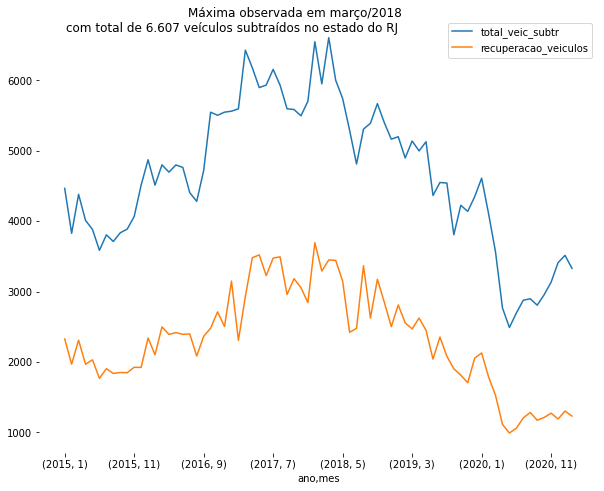

In [14]:
#plt.rcParams["figure.figsize"] = (18,11)
fig, ax = plt.subplots(figsize=(10,8))
plot_veic[['total_veic_subtr', 'recuperacao_veiculos']].plot(ax= ax)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.text(0.65, 1.025,
         'Máxima observada em março/2018\n'
         'com total de 6.607 veículos subtraídos no estado do RJ ',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize= 12);

Importante destacar que houve uma redução neste tipo de crime no período em que o Brasil declarou Pandemia da Covid19. Em maio/2020 foi o observado a quantidade mínima do período analisado, com 2.490 veículos roubados!

In [15]:
plot_veic.loc[plot_veic.total_veic_subtr == plot_veic.total_veic_subtr.min()]

,,furto_veiculos,roubo_veiculo,recuperacao_veiculos,total_veic_subtr
ano,mes,,,,
2020,5,904,1586,991,2490


In [16]:
plot_veic.total_veic_subtr.describe()

count      74.000000
mean     4660.918919
std      1029.093520
min      2490.000000
25%      3884.250000
50%      4708.500000
75%      5537.250000
max      6607.000000
Name: total_veic_subtr, dtype: float64

Pelo gráfico de linha acima conseguimos notar uma relação no sentido do aumento das subtrações de veículos, a recuperação de veículos acompanha no mesmo sentido. Estatisticamente essa relação é conhecida como **correlação**. Abaixo comprovamos que os dois atributos possui uma correlação positiva. 

In [17]:
correlations= plot_veic[['total_veic_subtr', 'recuperacao_veiculos']].\
corr(method= 'pearson')
correlations

,total_veic_subtr,recuperacao_veiculos
total_veic_subtr,1.000000,0.954149
recuperacao_veiculos,0.954149,1.000000


#### 3.4.3 Violação do patrimônio - celular
Nossa depêndencia dos "*smartphones*", como são conhecidos os celulares, é uma verdade para todos. Fazemos praticamente tudo nesses aparelhos. Por isso podemos chamar esses equipamentos de **patrimônio** pessoal.

Então vamos colocar uma lupa sobre a quantidade de crimes, que lesam as vítimas de seus queridos aparelhos celulares.

In [18]:
celular= df_6year[['roubo_celular', 'total_roubos', 'furto_celular',
                   'total_furtos']]
celular['total_cel_subtr'] = celular['roubo_celular']+ celular['furto_celular']
#celular= celular.groupby('ano')
celular.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


roubo_celular  total_roubos  ...  total_furtos  total_cel_subtr
ano  mes                               ...                               
2015 1            915.0         14367  ...         16354           2366.0
     2            906.0         12873  ...         17304           2760.0
     3            904.0         13219  ...         15722           2438.0
     4            890.0         12147  ...         14144           2273.0
     5            916.0         11965  ...         14834           2352.0

[5 rows x 5 columns]

**Visualização no comportamento dos roubos e furtos de celulares.**

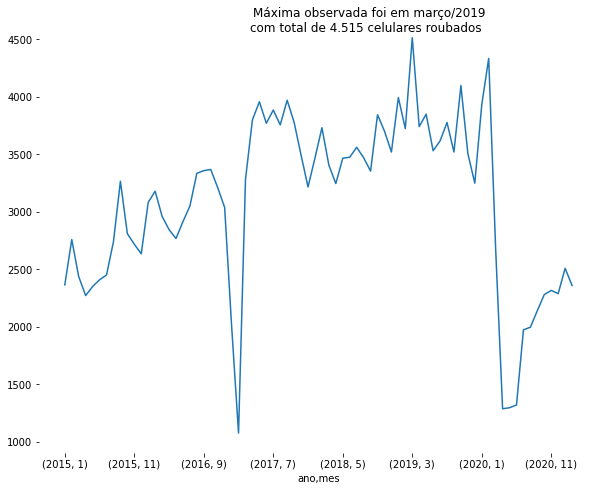

In [19]:
#plt.rcParams["figure.figsize"] = (18,11)
fig, ax = plt.subplots(figsize=(10,8))
celular['total_cel_subtr'].plot(ax= ax)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#plt.title('Evolução Roubo Celulares', loc= 'left')

plt.text(0.80, 1.025,
         'Máxima observada foi em março/2019\n'
         'com total de 4.515 celulares roubados ',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize= 12);

Dois pontos saltam aos olhos nesse gráfico da evolução dos roubos de celulares no estado do Rio de Janeiro, no período de jan/2015 a fev/2021:
* O ponto mínimo observado, refere-se ao registro do mês de fev/2017. Usando estatísitca descritivas podemos inferir que esse registro pode ter sido um possível erro de entrada de dados, pois foge a distribuição dos dados.
* Houve uma tendência de queda observada no período posterior ao decreto de Pandemia da Covid19 no Brasil.

In [20]:
celular.loc[celular.total_cel_subtr == celular.total_cel_subtr.max()]

,,roubo_celular,total_roubos,furto_celular,total_furtos,total_cel_subtr
ano,mes,,,,,
2019,3,2626.0,19558,1889.0,15395,4515.0


In [21]:
celular.describe()

,roubo_celular,total_roubos,furto_celular,total_furtos,total_cel_subtr
count,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1736.175676,15725.581081,1351.297297,12460.418919,3087.472973
std,551.695527,4083.976708,361.925586,2464.079283,748.398642
min,551.000000,7315.000000,305.000000,5722.000000,1078.000000
25%,1273.250000,12026.250000,1232.000000,11647.500000,2541.500000
50%,1855.000000,16173.500000,1391.000000,12828.000000,3258.500000
75%,2194.000000,19050.250000,1534.000000,13950.500000,3681.500000
max,2626.000000,23203.000000,2270.000000,17304.000000,4515.000000


In [22]:
 celular.loc[2017]

,roubo_celular,total_roubos,furto_celular,total_furtos,total_cel_subtr
mes,,,,,
1,1137.0,14221,875.0,10074,2012.0
2,551.0,9714,527.0,5795,1078.0
3,1937.0,19493,1346.0,13620,3283.0
4,2520.0,22928,1281.0,12711,3801.0
5,2548.0,23203,1410.0,13993,3958.0
6,2336.0,21165,1435.0,12686,3771.0
7,2468.0,21848,1418.0,12475,3886.0
8,2417.0,21806,1340.0,13120,3757.0
9,2215.0,19465,1756.0,13675,3971.0


#### 3.4.4 Violação da vida
Não poderíamos deixar de verificar o patrimônio, que no meu ponto de vista, é o mais importante, nossas **vidas**. Sem ela não temos condições de fazer nada nesse mundo terreno.

Os dados do ISP - RJ consolida os crimes contra a vida humana em um grupo denominado "Crimes Violentos". Há uma subcategoria, **`letalidade_violenta`** que é o somatórios dos seguintes crimes: Homicídio doloso; Lesão corporal seguida de morte; Latrocínio e Morte por intervenção de agente do Estado.

Vamos enxergar como estão esses dados!

##### 3.4.4.1 Evolução anual 

In [23]:
vida= df_6year['letalidade_violenta']
vida= vida.groupby('ano')
vida.sum()

ano
2015    5010
2016    6262
2017    6749
2018    6714
2019    5980
2020    4907
2021     934
Name: letalidade_violenta, dtype: int64

Aponta para um cenário de queda a subtração de vidas, classificadas pela Instituição de Segurança Pública do RJ, como Crimes com letalidade violenta.

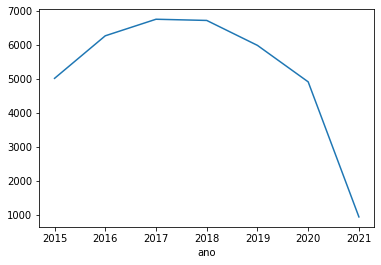

In [24]:
df_6year['letalidade_violenta'].groupby('ano').sum().plot();

**Visualização no comportamento de crimes contra a vida humana.**

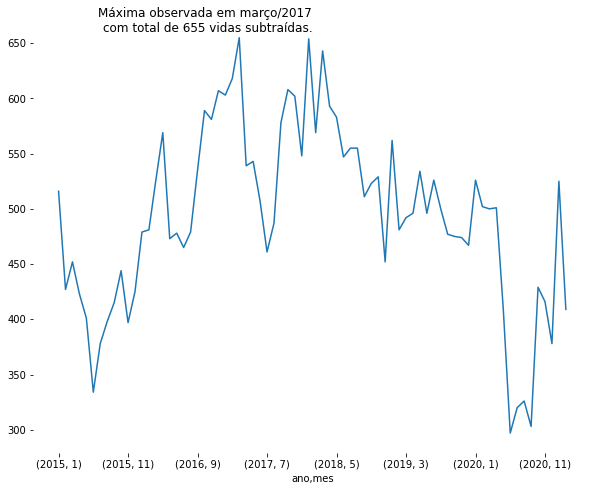

In [25]:
#plt.rcParams["figure.figsize"] = (18,11)
fig, ax = plt.subplots(figsize=(10,8))
df_6year['letalidade_violenta'].plot(ax= ax)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

plt.text(0.50, 1.025,
         'Máxima observada em março/2017\n'
         'com total de 655 vidas subtraídas.',
         horizontalalignment='right',
         verticalalignment='top',
         transform=ax.transAxes,
         fontsize= 12);

Interpretando o gráfico, verificamos que após o ano de 2018 inciou uma redução na quantidade observada de crimes dessa natureza.

Fica evidente, que no período em que decretou-se a Pandemia da Covid19 no Brasil, houve uma redução grande de crimes de letalidade violenta. No entanto, fica claro que a partir de novembro/2020 há uma tendência de alta, indicando uma retomada na séria para níveis anteriores.

In [26]:
df_6year.loc[df_6year['letalidade_violenta'] == df_6year['letalidade_violenta'].max()]

,,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017,3,498,6.0,28,532.0,123.0,655,449,3897,421.0,175.0,1396.0,6109,1937.0,1306,9352,5002,781,527,98,3,7.0,4.0,32.0,26.0,3661,19493,1428,1536,472.0,1346.0,158.0,8680,13620,3.0,131.0,1.0,1996.0,1706,488.0,1090.0,151.0,2932,3062.0,811.0,1425.0,93.0,3058.0,350.0,33,1.0,1.0,0.0,60412.0,3


In [27]:
df_6year.loc[df_6year['letalidade_violenta'] == df_6year['letalidade_violenta'].min()]

,,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
ano,mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,6,259,2.0,2,263.0,34.0,297,307,3156,394.0,143.0,882.0,2849,951.0,580,4380,1743,404,199,38,0,5.0,8.0,49.0,15.0,1079,7920,954,331,172.0,371.0,80.0,4797,6705,0.0,93.0,12.0,5210.0,1502,592.0,818.0,131.0,1060,2145.0,308.0,763.0,8.0,2827.0,210.0,20,1.0,3.0,0.0,41912.0,3


In [28]:
df_6year['letalidade_violenta'].describe()

count     74.000000
mean     494.000000
std       82.254533
min      297.000000
25%      446.000000
50%      498.000000
75%      547.750000
max      655.000000
Name: letalidade_violenta, dtype: float64

## 4. Conclusões

Todo processo de análise em *Data Science* as conclusões são únicas, pois reflete aos dados no contexto do problema de negócio apontado no início do projeto. Este dataSet que utilizamos é bom para praticar manipulação de dados e suas variações. Mudando a perspectiva de como os dados são aprensentados podemos obter bons *insights*.

Das 3 variáveis que observamos, por ser tratar do tema **violência** gostaríamos de ter cenários com tendências mensais de queda. No entanto, quando plotamos os dados históricos observamos que há uma linearidade nos crimes.

Notamos, também que, das 3 varíaveis observadas, todas as máximas foram observadas nos meses de março, independente do ano. Que indica que o mês de março no estado do Rio de Janeiro não seria uma boa idéia *ficar de bobeira*. Podemos ainda afirmar que no período em que foi decretado Pandemia da Covid19 no Brasil, março/2020, notou-se redução desses delitos, uma vez que as vítimas não ficaram expostas às ações de criminosos.

O objetivo desse jupyter foi mostrar que *Data Science* não é apenas uso de inteligência artificial, o processo exploratório dos dados, que prepara os mesmos para uso de *Machine Learning* podem render bons insights.




---



## Anexos

## Tratamento dos dados na fonte

No primeiro contato com dados não observamos valores faltantes, pode até ser uma ponto positivo, mas dados públicos com "0" (zero) de missing é muita perfeição. Foi observado valores categóricos (indicam classes - `object`) e valores numéricos. O que salta aos olhos são os valores classificados como categóricos `object`. Como as observações são os **registros mensais** por ocorrência, deveríamos ter dados em seu formato `float` ou `integer`. 


Compreendendo a atribuição do formato categórico, observamos que a série histórica inicia em jan/1991. Algumas variáveis começam a fazer parte da série histórica a partir de algum período específico. Ou seja, a variável `hom_doloso` observa-se informações a partir de  jan/1999, ao passo que, `roubo_bicicleta` inicia, na série histórica, a partir de jan/2014. Portanto, o que é anterior ao início dessas observações destas variáveis, o registro é um *espaço* ` `, o que faz com que na carga dos dados seja considerado uma variável categórica, que de fato não representa a informação. Foram atribuidos à 31 variáveis o tipo categórico.

Decidimos excluir esse *espaço* ` `, antes da carga, por ser um conjunto de dados pequenos.

In [29]:
dados_orig = "https://raw.githubusercontent.com/angeloBuso/ViolenciaRJ/main/dataset/DOMensalEstadoDesde1991.csv"
df_orig = pd.read_csv(dados_orig, delimiter=';')

In [30]:
df_orig.head(10)

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,,15,,,672,162,3051,,,,967,,381,1348,1174,63,350,188,37,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,3
1,1991,2,732,,17,,,749,175,3421,,,,963,,432,1395,1097,64,357,171,35,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,3
2,1991,3,713,,25,,,738,216,3613,,,,963,,422,1385,1265,71,443,191,43,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,3
3,1991,4,634,,20,,,654,200,3211,,,,1186,,354,1540,1415,81,425,199,36,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,3
4,1991,5,650,,20,,,670,146,3051,,,,931,,335,1266,1449,82,553,231,27,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,3
5,1991,6,647,,14,,,661,201,2977,,,,831,,342,1173,1354,82,518,178,37,,,,,81,3423,1992,673,,,,3519,6184,,,,,157,,,,802,,,,,,,111,,,,,3
6,1991,7,558,,14,,,572,201,2784,,,,797,,308,1105,1365,82,496,186,25,,,,,94,3353,1978,700,,,,3604,6282,,,,,203,,,,870,,,,,,,126,,,,,3
7,1991,8,557,,11,,,568,209,3134,,,,813,,299,1112,1347,71,498,189,29,,,,,88,3334,1835,794,,,,3641,6270,,,,,215,,,,809,,,,,,,79,,,,,3
8,1991,9,542,,19,,,561,146,3026,,,,805,,281,1086,1353,91,473,199,12,,,,,90,3304,1993,810,,,,3460,6263,,,,,179,,,,756,,,,,,,71,,,,,3
9,1991,10,613,,21,,,634,200,3482,,,,834,,328,1162,1470,83,561,228,16,,,,,107,3627,1999,862,,,,3621,6482,,,,,184,,,,818,,,,,,,95,,,,,3


In [31]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ano                         362 non-null    int64 
 1   mes                         362 non-null    int64 
 2   hom_doloso                  362 non-null    int64 
 3   lesao_corp_morte            362 non-null    object
 4   latrocinio                  362 non-null    int64 
 5   cvli                        362 non-null    object
 6   hom_por_interv_policial     362 non-null    object
 7   letalidade_violenta         362 non-null    int64 
 8   tentat_hom                  362 non-null    int64 
 9   lesao_corp_dolosa           362 non-null    int64 
 10  estupro                     362 non-null    object
 11  hom_culposo                 362 non-null    object
 12  lesao_corp_culposa          362 non-null    object
 13  roubo_transeunte            362 non-null    int64 

In [32]:
categ= df_orig.select_dtypes(exclude ='int64')
print('Foram atribuidos à {} variáveis o tipo categórico'.format(categ.shape[1]))
categ

Foram atribuidos à 31 variáveis o tipo categórico


,lesao_corp_morte,cvli,hom_por_interv_policial,estupro,hom_culposo,lesao_corp_culposa,roubo_celular,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,furto_coletivo,furto_celular,furto_bicicleta,sequestro,extorsao,sequestro_relampago,estelionato,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,2,284,145,452,175,1834,1277,0,6,52,15,431,1005,157,0,105,11,4593,972,910,173,2787,369,993,37,4194,297,4,2,0,50772
358,2,335,81,467,183,1769,1301,2,7,64,12,395,1017,148,1,107,7,3723,803,820,147,2629,381,642,37,4055,316,3,1,1,47940
359,3,294,84,424,192,1651,1272,4,6,68,24,318,1018,157,0,112,5,3541,784,827,133,2673,360,906,40,4116,308,0,1,1,47841
360,2,376,149,469,168,1666,1410,10,6,70,41,355,1100,160,0,114,5,3906,796,909,153,2924,444,808,50,4857,383,4,0,0,52352


<img alt="Imagem" width="30%" src="https://github.com/angeloBuso/ViolenciaRJ/blob/main/image/Capturar.PNG?raw=true">




---



## Dicionário de dados

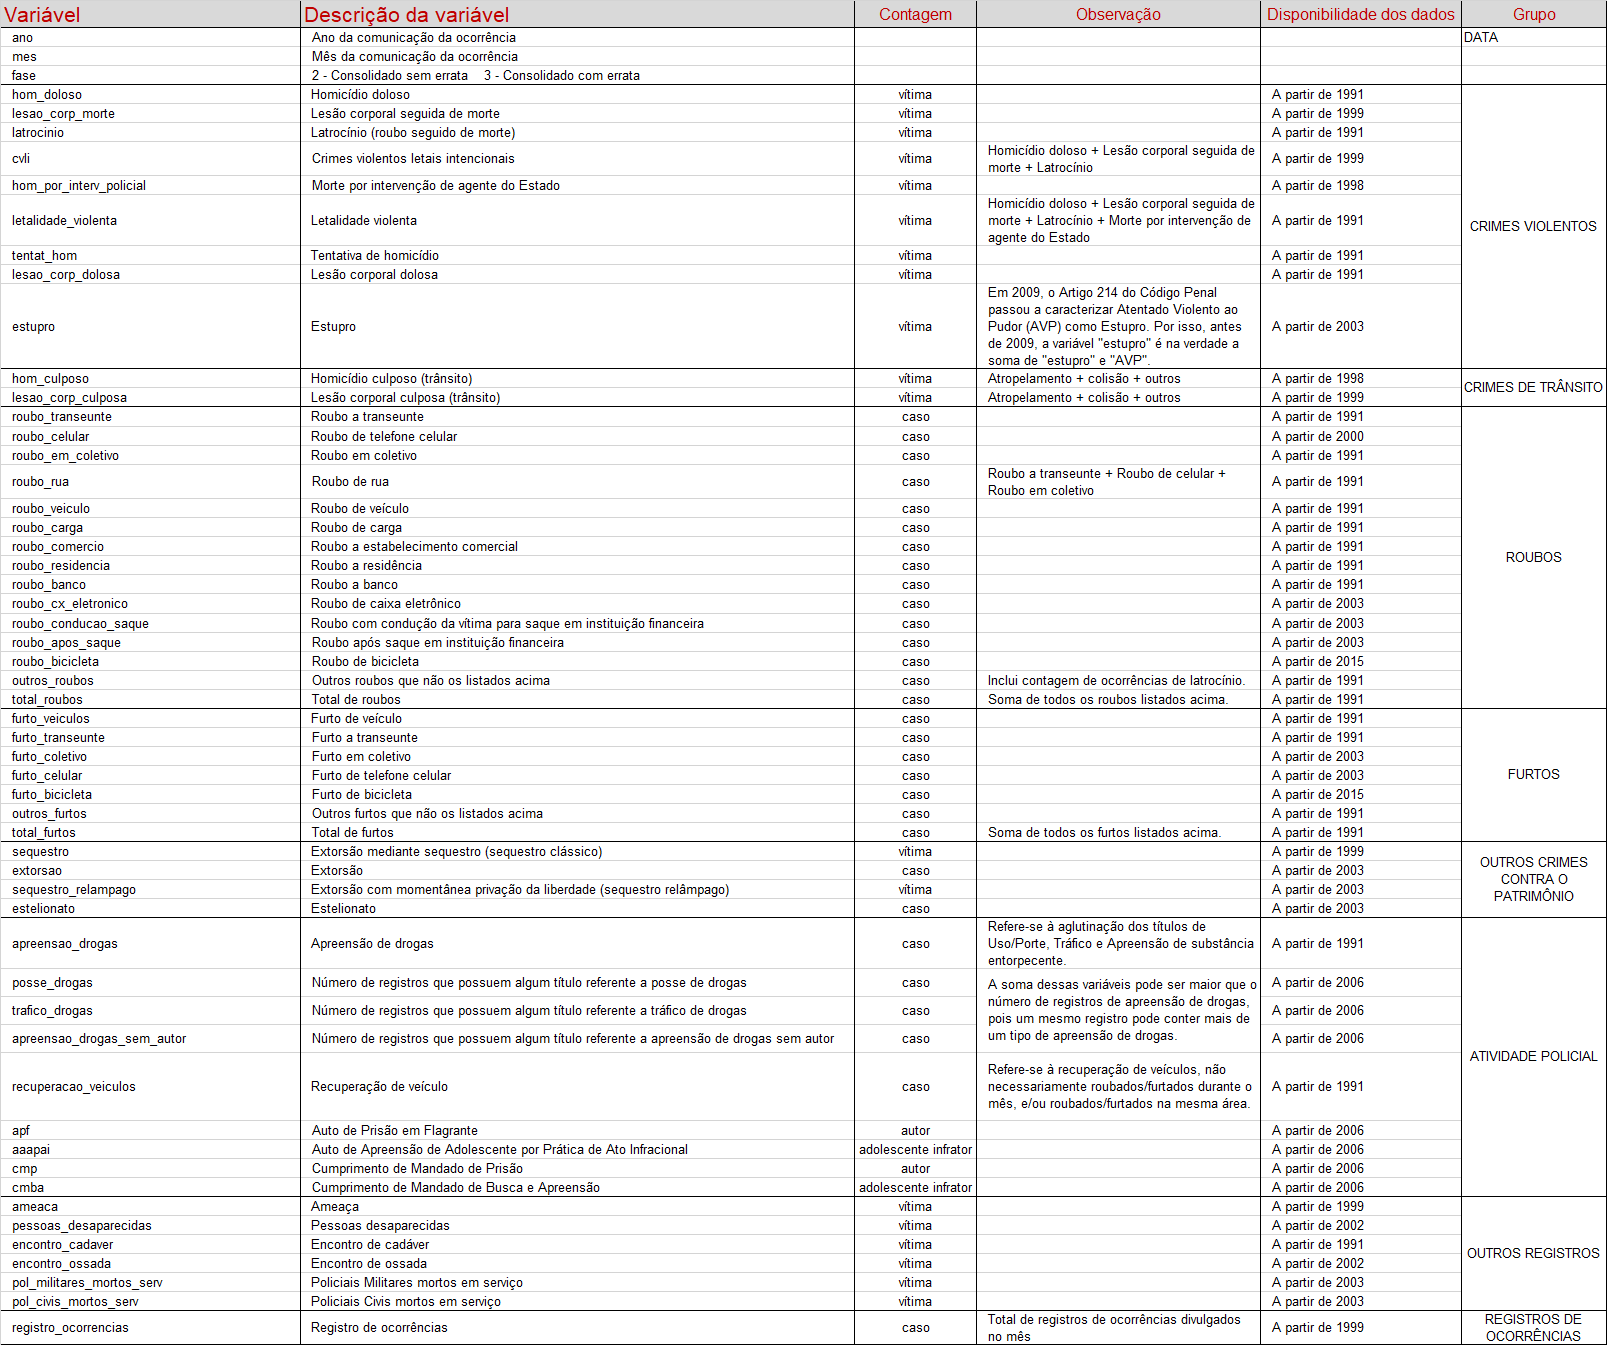



---
Qualquer dúvida que tiver referente ao presente projeto pode entrar em [contato](https://github.com/angeloBuso/ViolenciaRJ/issues), ou pelo [LinkedIn](https://www.linkedin.com/in/angelo-buso/), será uma honra auxiliar!!!